# Машинное обучение, ММП ВМК МГУ

## Практическое задание 1

### Общая информация
Дата выдачи: 15.09.2019 

Мягкий дедлайн: 07:59MSK 26.09.2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 07:59MSK 30.09.2019  

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

### Пример разметки Markdown

Code block:

```python
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical)
])
```
Task list:

- [x] make out the Taxi notebook
- [ ] complete the hometask
- [ ] prepare to next lesson

Insert *random* image into the text:

![random image](https://picsum.photos/seed/picsum/200/300)

---

$\overline{X} = \frac{\sum_{i = 1}^{n} x_{i}}{n}$



In [30]:
import numpy as np

print("Pi number is equal to %.6f" % np.pi)

Pi number is equal to 3.141593


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки:
<img src="https://st2.depositphotos.com/1177973/9266/i/950/depositphotos_92668716-stock-photo-red-cat-with-computer-keyboard.jpg" style="width: 400px">



## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [4]:
%pylab inline 
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### Внимание! Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [5]:
data = pd.read_csv('data.csv')
data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [6]:
unique_items = data['item_name'].unique()

print("Total items in dataset: %d" % data.shape[0])

print("Unique items: %d" % len(unique_items))

Total items in dataset: 4622
Unique items: 50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [7]:
naCount = pd.isna(data).sum()
for colName in data.columns:
    print("NaN count in column '%s' is: %d" % (colName, naCount[colName]))

NaN count in column 'order_id' is: 0
NaN count in column 'quantity' is: 0
NaN count in column 'item_name' is: 0
NaN count in column 'choice_description' is: 1246
NaN count in column 'item_price' is: 0


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [8]:
numberCols = data.select_dtypes([np.number])
data[numberCols.columns] = data[numberCols.columns].fillna(0)

objCols = data.select_dtypes(['object'])
data[objCols.columns] = data[objCols.columns].fillna('')

data[data['choice_description'] == ''].head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
6,3,1,Side of Chips,,$1.69
10,5,1,Chips and Guacamole,,$4.45
14,7,1,Chips and Guacamole,,$4.45


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).
Будьте внимательны! В item_price записана цена товара * количество товара.

In [9]:
data['price'] = data.apply(lambda x: pd.to_numeric(x['item_price'].strip('$')) / x['quantity'], axis=1)
data.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,8.49


Какая средняя/минимальная/максимальная цена у товара? 

In [10]:
priceMean = data['price'].mean()
priceMin = data['price'].min() 
priceMax = data['price'].max()

print("Price mean value: %.2f" % priceMean)
print("Price min value: %.2f" % priceMin)
print("Price max value: %.2f" % priceMax)

Price mean value: 7.08
Price min value: 1.09
Price max value: 11.89


Удалите старую колонку с ценой.

In [11]:
data.drop('item_price', axis = 1, inplace = True)
data.head()

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (уникальный товар = уникальный choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [12]:
tmpData = data.drop_duplicates(subset = "choice_description", keep = 'first')

print("TOP5 the cheapest items: ")
tmpData.sort_values(by=["price"], ascending=[True], inplace = True)

tmpData.head()

TOP5 the cheapest items: 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,order_id,quantity,item_name,choice_description,price
51,23,2,Canned Soda,[Mountain Dew],1.09
162,73,2,Canned Soda,[Diet Coke],1.09
126,55,1,Canned Soda,[Coca Cola],1.09
28,14,1,Canned Soda,[Dr. Pepper],1.09
117,51,1,Canned Soda,[Diet Dr. Pepper],1.09


In [13]:
print("TOP5 the most expensive items: ")
tmpData.tail()

TOP5 the most expensive items: 


,order_id,quantity,item_name,choice_description,price
1159,478,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89
3350,1343,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Cheese, Guacamole, Lettu...",11.89
2740,1088,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89
1571,637,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Sour ...",11.89


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [14]:
multiChickenBowl = len(data[(data['item_name'] == 'Chicken Bowl') & (data['quantity'] > 1)])

print("Orders with more than only one portion of Chicken Bowl: %d" % multiChickenBowl)

Orders with more than only one portion of Chicken Bowl: 33


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [15]:
averageСheck = data.groupby('order_id')['price'].sum().mean()
print("Average check is: $%.2f" % averageСheck)

avarageAmount = data.groupby('order_id')['quantity'].sum().mean()
print("Average item amount is: %.2f" % avarageAmount)


Average check is: $17.85
Average item amount is: 2.71


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [16]:
tmpData = data.groupby('order_id')['order_id'].agg('count').to_frame('c').reset_index()
singleOrderCount = len(data[data['order_id'].isin(tmpData[tmpData['c'] == 1]['order_id'])])

print("Orders with only one item: %d" % singleOrderCount)

Orders with only one item: 128


#### 9. [0.25 баллов] Какая самая популярная категория товара? (в комментариях поясните, что вы считаете за "популярностью")

In [17]:
subSums = data.groupby(['item_name'])['quantity'].sum()
mostPopularCategory = pd.DataFrame(subSums).sort_values(['quantity'], ascending=False).iloc[0]

print("The most popular category is '%s' with %d sales" % (mostPopularCategory.name, mostPopularCategory))

The most popular category is 'Chicken Bowl' with 761 sales


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [18]:
burritoCategories = data[data['item_name'].str.contains('burrito', case = False)]['item_name'].unique()
allBurritos = data[data['item_name'].isin(burritoCategories)]['choice_description'].unique()
print("We have %d burrito types totally" % len(allBurritos))

burritosData = data['choice_description'].isin(allBurritos)

groupedByQuantityBurrito = data[burritosData].groupby('choice_description')['quantity'].agg('count').to_frame('c').reset_index()
mostDemandedBurrito = pd.DataFrame(groupedByQuantityBurrito).sort_values(by=['c'], ascending=False).iloc[0]
print("The most demanded burrito is '%s' \r\n\twith demands amount equal to %d" % 
      (mostDemandedBurrito['choice_description'], mostDemandedBurrito['c'])
)

mostExpensiveBurrito = data[burritosData].sort_values(by=['price'], ascending=False).iloc[0]
print("The most expensive burrito is '%s' \r\n\twith price equal to $%.2f" % 
      (mostExpensiveBurrito['choice_description'], mostExpensiveBurrito['price'])
)

We have 573 burrito types totally
The most demanded burrito is '[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]' 
	with demands amount equal to 42
The most expensive burrito is '[Tomatillo Red Chili Salsa, [Black Beans, Cheese, Sour Cream, Guacamole]]' 
	with price equal to $11.89


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [19]:
# add new columnt 'order_price'
totalPrices = data.groupby('order_id')['price'].sum().to_frame('total_price').reset_index()
data['order_price'] = data['price'].groupby(data['order_id']).transform('sum')

ordersWithItem40Amount = len(data[data['price'] > data['order_price'] * 0.4]['order_id'].unique())
print("In %d orders a single item cost exceeds 40%% of total price" % ordersWithItem40Amount)

In 1629 orders a single item cost exceeds 40% of total price


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [20]:
badPriceCond = (data['choice_description'] == '[Diet Coke]') & (data['price'] == 1.25)
soldCokeWithBadPrice = data[badPriceCond]['quantity'].sum()

diffMoney = soldCokeWithBadPrice * (1.35 - 1.25)
print("The owner have lost profit equal to $%.2f" % diffMoney)

The owner have lost profit equal to $11.50


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [21]:
data2 = np.random.rand(10, 3)

newData = pd.DataFrame(data2, columns=['index', 'column1', 'column2'])
newData = newData.set_index('index')

newData.head()

,column1,column2
index,,
0.024754,0.392589,0.085793
0.979473,0.718604,0.378058
0.788248,0.676162,0.109522
0.606741,0.792500,0.860258
0.611623,0.496845,0.383682


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [22]:
newData.to_csv('hw1.csv', sep='\t', encoding='utf-8', index = False, header = False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- должно быть название (title) графика;
- на графиках должны быть подписаны оси;
- должны быть подписаны единицы измерения;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %matplotlib inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [24]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(data.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
data['date'] = data.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot. Также может быть удобно изобразить гистограмму в логарифмической шкале (см. semilogy).

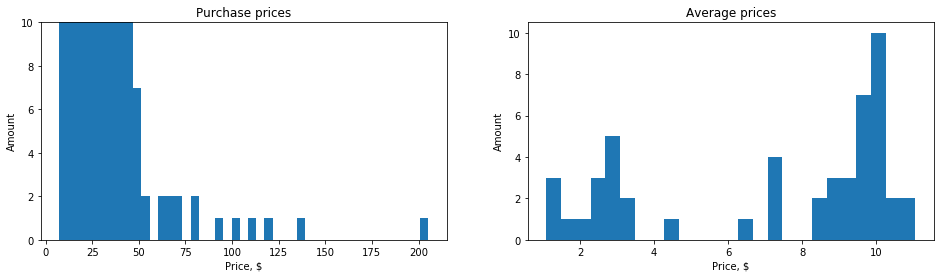

In [31]:
orderPrices = data.groupby('order_id')['price'].sum().to_frame('price').reset_index()
categoryPrices = data.groupby('item_name')['price'].mean().to_frame('mean').reset_index()

fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
axs[0].set_title("Purchase prices")
axs[0].set_xlabel("Price, $")
axs[0].set_ylabel("Amount")
axs[0].set_ylim(0, 10)
axs[0].hist(list(orderPrices['price']), 45)

axs[1].set_title("Average prices")
axs[1].set_xlabel("Price, $")
axs[1].set_ylabel("Amount")
axs[1].hist(list(categoryPrices['mean']), 25)
plt.show()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

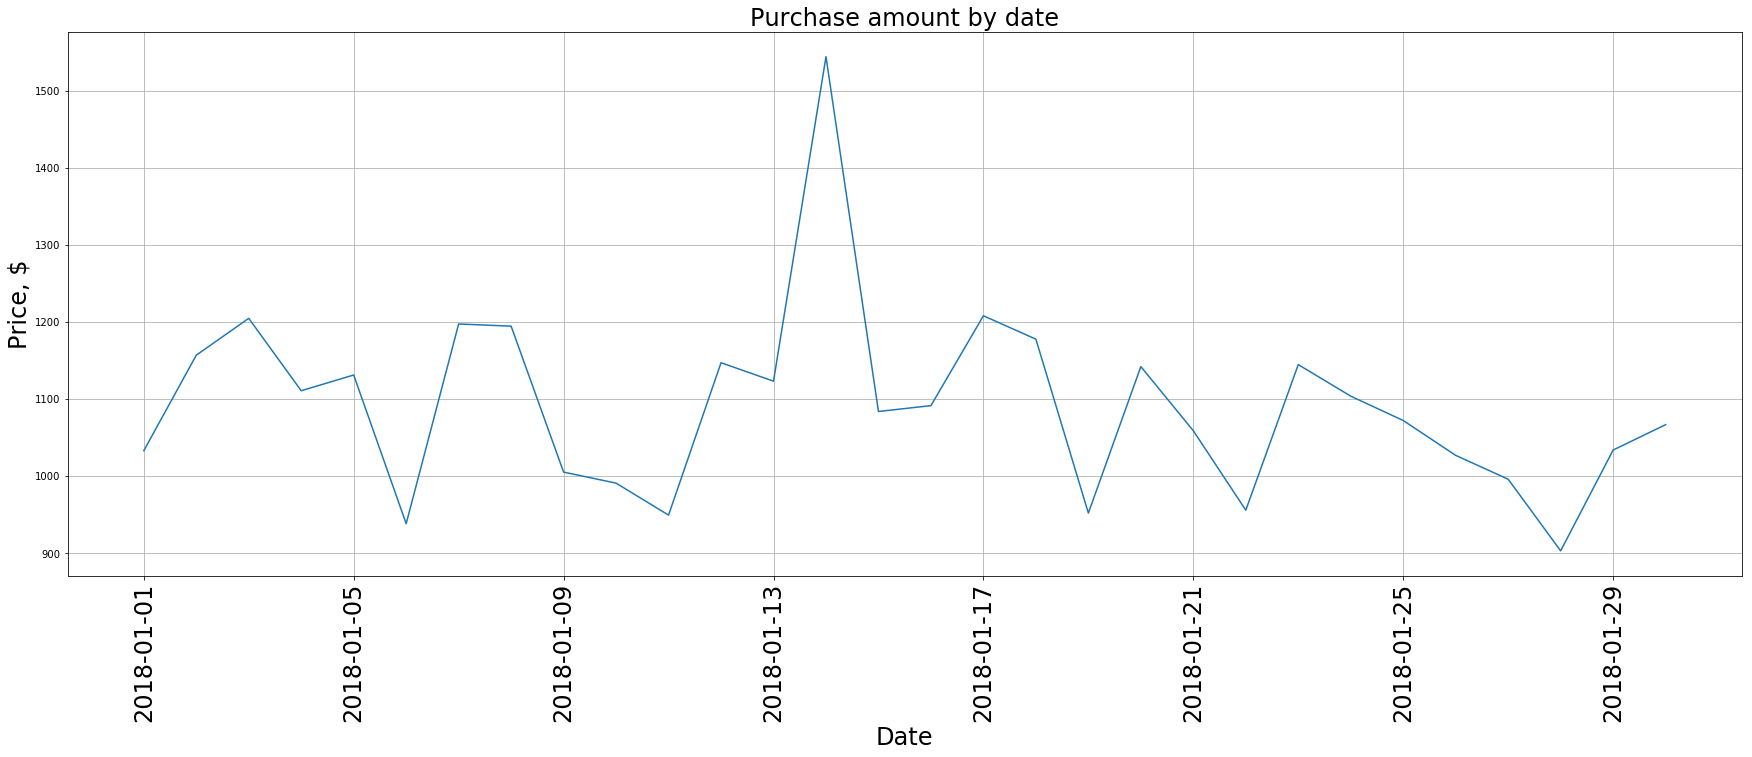

In [35]:
dfTmp = pd.DataFrame(data.groupby(['order_id', 'order_price', 'date']).sum().reset_index())
salesByDate = dfTmp.groupby(['date'])['price'].sum().to_frame('price').reset_index()

plt.figure(figsize=(30,10))
plt.plot(salesByDate['date'], salesByDate['price'])
plt.title("Purchase amount by date", {'size':'24'})
plt.xlabel("Date", {'size':'24'})
plt.xticks(rotation='vertical', fontsize=24)
plt.ylabel("Price, $", {'size':'24'})
plt.grid()
plt.show()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

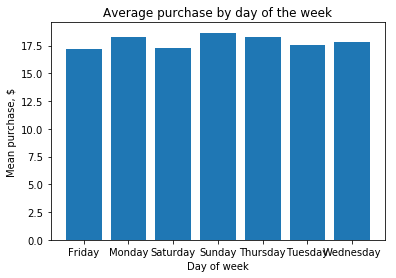

In [33]:
data['date'] =  pd.to_datetime(data['date'])

dfTmp = pd.DataFrame(data.groupby(['order_id', 'order_price', 'date']).sum().reset_index())
purchaseDataByDay = pd.DataFrame(dfTmp.groupby(dfTmp['date'].dt.weekday_name)['order_price'].mean())

plt.bar(purchaseDataByDay.index.values, purchaseDataByDay['order_price'])
plt.title("Average purchase by day of the week")
plt.xlabel("Day of week")
plt.ylabel("Mean purchase, $")
plt.show()

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

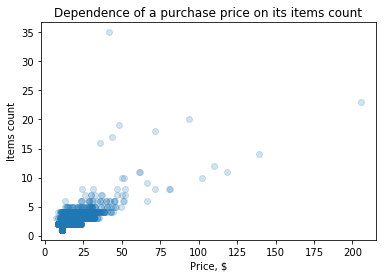

In [34]:
dependMoneyOfCount = data.groupby(['order_id', 'order_price'])['quantity'].sum().to_frame('item_count').reset_index()
dependMoneyOfCount

f = plt.figure()
plt.scatter(dependMoneyOfCount['order_price'], dependMoneyOfCount['item_count'], alpha=0.2)
plt.title("Dependence of a purchase price on its items count")
plt.xlabel("Price, $")
plt.ylabel("Items count")
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [29]:
f.savefig("hw1.pdf", bbox_inches='tight')

## Это интересно!
* Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 
* Для рисования графиков, с которыми можно взаимодействовать онлайн, есть библиотека [plotly](https://plot.ly/python/). Для запуска оффлайн может пригодиьтся from plotly.offline import init_notebook_mode init_notebook_mode(connected=True). Хороший пример использования: https://habr.com/en/post/308162/